### Übungsaufgabe: Abrufen und Analysieren von Daten aus einem RSS-Feed

**Ziel der Aufgabe:** Diese Übung testet Ihre Fähigkeit, Daten aus einem RSS-Feed zu extrahieren, die Datenstruktur zu verstehen und daraus Informationen zu visualisieren.

#### Aufgabenstellung:

1. Abruf des RSS-Feeds:
    - Verwenden Sie die Bibliothek feedparser, um einen RSS-Feed von einer Nachrichtenquelle Ihrer Wahl abzurufen (Sie können z.B. den RSS-Feed der NZZ verwenden: "https://www.nzz.ch/startseite.rss").
    - Frage: *Welche Struktur liefert der feedparser, wenn Sie den Feed abrufen? Welches Format haben die Einträge (entries) im Feed?*
    - Antwort: *EDer feedparser liefert ein verschachteltes Dictionary, in dem feed die Metadaten des gesamten Feeds enthält, und entries eine Liste von Dictionaries ist, in denen jeder Eintrag die Daten eines einzelnen Artikels enthält.Die häufig genutzten Felder innerhalb eines entry-Dictionaries sind title, link, published, und summary.*

2. Extrahieren und Anzeigen der Titel und Links:
    - Gehen Sie durch die Einträge im Feed und extrahieren Sie die folgenden Informationen:
        - Titel des Artikels
        - Veröffentlichungsdatum
        - Link zum Artikel
    - Frage: Erstellen Sie ein DataFrame, das die extrahierten Informationen (Titel, Veröffentlichungsdatum und Link) in separaten Spalten darstellt.

3. Daten visualisieren - WordCloud der Titel:
    - Erstellen Sie einen WordCloud, der die am häufigsten vorkommenden Wörter in den Artikeltiteln des Feeds darstellt.
    - Verwenden Sie die Bibliothek WordCloud für diese Visualisierung.
    - Frage: *Was können Sie aus der WordCloud über die häufigsten Themen in den Artikeln ableiten?*
    - Antwort: *Welche Begriffe in den Artikeltiteln des RSS-Feeds am häufigsten vorkommen. Die WordCloud visualisiert die Wörter anhand ihrer Häufigkeit im Text (häufige Wörter sind grösser). => Ableiten: Hauptthemen und Trends*

4. Zusätzliche Analysefrage:
    - Interpretation der Ergebnisse: Stellen Sie sich vor, Sie sammeln regelmäßig Daten aus diesem RSS-Feed. Wie könnten Sie diese Daten verwenden, um Trends oder wiederkehrende Themen zu erkennen?
    - Antwort: 
        1. Häufigkietsanalyse: Bestimmen, welche Themen im Laufe der Zeit häufiger oder seltener besprochen werden.
        2. Zeitliche Trends identifizieren
        3. Erkennen wiederkehrender Themen oder Ereignisse

#### Erwartetes Ergebnis:

Die Ausgabe sollte die folgenden Elemente enthalten:
    - Ein DataFrame, der die Titel, Veröffentlichungsdaten und Links enthält.
    - Eine WordCloud-Grafik, die die häufigsten Wörter in den Artikeltiteln anzeigt.

#### Lösung

1. Abrufen des RSS-Feeds

In [6]:
import feedparser

# RSS-Feed von der NZZ-Website abrufen
feed = feedparser.parse("https://www.nzz.ch/startseite.rss")


2. Extrahieren der Daten und in ein DataFrame umwandeln:

In [7]:
import pandas as pd

# Initialisiere Listen für das DataFrame
titles = []
publish_dates = []
links = []

# Daten extrahieren
for entry in feed.entries:
    titles.append(entry.title)
    publish_dates.append(entry.published)
    links.append(entry.link)

# DataFrame erstellen
df = pd.DataFrame({
    'Title': titles,
    'Published Date': publish_dates,
    'Link': links
})

# DataFrame anzeigen
print(df.head())

                                               Title  \
0  Der Wunsch nach dem starken Mann: Donald Trump...   
1  American Heartbreak: Was Trumps Rückkehr mit u...   
2  Trump vervollständigt seinen Sieg und gewinnt ...   
3  INTERVIEW - «Nordkorea hat den Stalinismus per...   
4  LIVE - Krieg in der Ukraine: Russland meldet D...   

                  Published Date  \
0  Sat, 09 Nov 2024 20:45:00 GMT   
1  Sat, 09 Nov 2024 20:45:00 GMT   
2  Sun, 10 Nov 2024 06:40:54 GMT   
3  Sat, 09 Nov 2024 20:45:00 GMT   
4  Sun, 10 Nov 2024 11:16:17 GMT   

                                                Link  
0  https://www.nzz.ch/international/der-wunsch-na...  
1  https://www.nzz.ch/international/american-hear...  
2  https://www.nzz.ch/international/us-wahlen-202...  
3  https://www.nzz.ch/report-und-debatte/suedkore...  
4  https://www.nzz.ch/international/krieg-in-der-...  


3. Transformation

In [8]:
# Schritt 1: Datum formatieren
df['Published Date'] = pd.to_datetime(df['Published Date'], format='%a, %d %b %Y %H:%M:%S %Z')

# Schritt 2: Eine Spalte mit der Anzahl der Wörter im Titel hinzufügen
df['Title Word Count'] = df['Title'].apply(lambda x: len(x.split()))

# Schritt 3: Link kürzen, um nur die Domain anzuzeigen (optional)
df['Short Link'] = df['Link'].apply(lambda x: x.split('/')[2])

# Schritt 4: Optimierte Anzeige des DataFrames
pd.set_option('display.max_colwidth', 50)  # Limitiert die Spaltenbreite für Übersichtlichkeit
df.head()

,Title,Published Date,Link,Title Word Count,Short Link
0,Der Wunsch nach dem starken Mann: Donald Trump...,2024-11-09 20:45:00+00:00,https://www.nzz.ch/international/der-wunsch-na...,15,www.nzz.ch
1,American Heartbreak: Was Trumps Rückkehr mit u...,2024-11-09 20:45:00+00:00,https://www.nzz.ch/international/american-hear...,11,www.nzz.ch
2,Trump vervollständigt seinen Sieg und gewinnt ...,2024-11-10 06:40:54+00:00,https://www.nzz.ch/international/us-wahlen-202...,19,www.nzz.ch
3,INTERVIEW - «Nordkorea hat den Stalinismus per...,2024-11-09 20:45:00+00:00,https://www.nzz.ch/report-und-debatte/suedkore...,24,www.nzz.ch
4,LIVE - Krieg in der Ukraine: Russland meldet D...,2024-11-10 11:16:17+00:00,https://www.nzz.ch/international/krieg-in-der-...,19,www.nzz.ch


4. Erstellen der WordCloud:

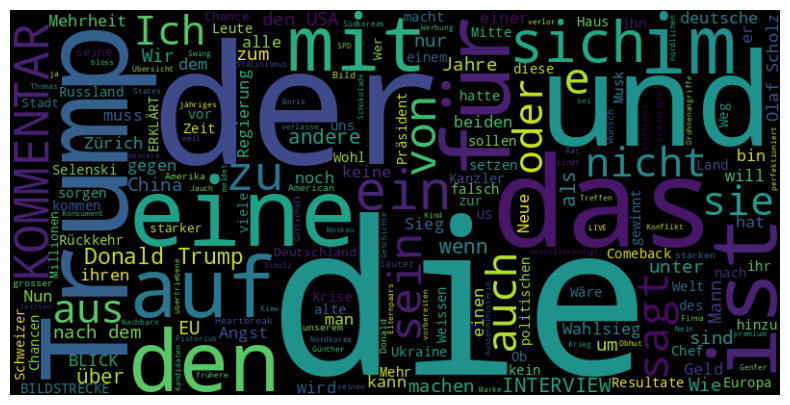

In [9]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Titel in einen String umwandeln
wordcloud_text = " ".join(titles)

# WordCloud generieren
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(wordcloud_text)

# WordCloud anzeigen
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


##### Lösungserklärung

- Abrufen und Strukturieren der Daten: Die feedparser-Bibliothek wird verwendet, um den RSS-Feed zu lesen. Jeder Eintrag im Feed wird dann in den Listen titles, publish_dates und links gespeichert.
- DataFrame-Erstellung: Die Daten werden in ein DataFrame umgewandelt, um die Artikelinformationen strukturiert darzustellen.
- WordCloud: Der WordCloud-Generator visualisiert die Titel. Häufig vorkommende Wörter werden größer dargestellt und zeigen die Hauptthemen des Feeds.

### Gleiches Beispiel mit The Guardian

Erster Blick auf den DataFrame:
                                               Title  \
0  Burkina Faso wants to reinstate death penalty,...   
1  ‘Africa in a glass’: Abidjan cocktail week mix...   
2  US cancels $1.1bn of Somalia’s debt in ‘histor...   
3  Death toll rises as protesters rage against Mo...   
4  Botswana president concedes defeat in election...   

                  Published Date  \
0  Sat, 09 Nov 2024 20:07:49 GMT   
1  Fri, 08 Nov 2024 16:36:50 GMT   
2  Wed, 06 Nov 2024 14:10:39 GMT   
3  Sat, 02 Nov 2024 12:59:59 GMT   
4  Fri, 01 Nov 2024 11:21:01 GMT   

                                                Link  
0  https://www.theguardian.com/world/2024/nov/09/...  
1  https://www.theguardian.com/world/2024/nov/08/...  
2  https://www.theguardian.com/global-development...  
3  https://www.theguardian.com/world/2024/nov/02/...  
4  https://www.theguardian.com/world/2024/nov/01/...  
Optimierter DataFrame:
                                               Title  \
0  Bu

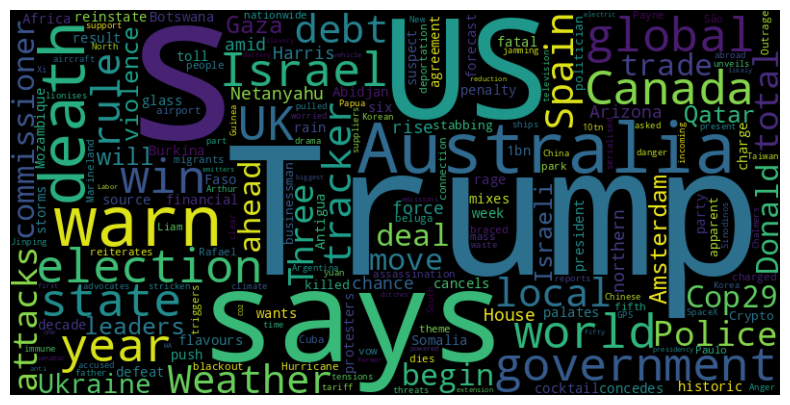

In [10]:
# Schritt 1: Abrufen des RSS-Feeds
import feedparser
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# RSS-Feed von The Guardian abrufen
feed = feedparser.parse("https://www.theguardian.com/world/rss")

# Schritt 2: Extrahieren der Daten und in ein DataFrame umwandeln
# Initialisiere Listen für das DataFrame
titles = []
publish_dates = []
links = []

# Daten extrahieren
for entry in feed.entries:
    titles.append(entry.title)
    publish_dates.append(entry.published)
    links.append(entry.link)

# DataFrame erstellen
df = pd.DataFrame({
    'Title': titles,
    'Published Date': publish_dates,
    'Link': links
})

# DataFrame anzeigen
print("Erster Blick auf den DataFrame:")
print(df.head())

# Schritt 3: Transformation
# Datum formatieren
df['Published Date'] = pd.to_datetime(df['Published Date'], format='%a, %d %b %Y %H:%M:%S %Z')

# Eine Spalte mit der Anzahl der Wörter im Titel hinzufügen
df['Title Word Count'] = df['Title'].apply(lambda x: len(x.split()))

# Link kürzen, um nur die Domain anzuzeigen (optional)
df['Short Link'] = df['Link'].apply(lambda x: x.split('/')[2])

# Optimierte Anzeige des DataFrames
pd.set_option('display.max_colwidth', 50)
print("Optimierter DataFrame:")
print(df.head())

# Schritt 4: Erstellen der WordCloud
# Titel in einen String umwandeln
wordcloud_text = " ".join(titles)

# WordCloud generieren
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(wordcloud_text)

# WordCloud anzeigen
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


THE END